### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ccxt
import yfinance as yf
from statsmodels import regression
%matplotlib inline 

### Fetching and Processing Data

In [157]:
start = datetime(2020, 1, 1)
end = datetime(2023,1,1)
annualize_days = 365
risk_free_return = 0.02

def df_process(coin, start, end):
    df = yf.download(coin, start=start, end=end)
    df_returns = pd.DataFrame(df['Adj Close'].values)
    df_returns.index = df.index.values[0:df.index.values.shape[0]]
    df_returns.columns = [f'{coin} Returns']
    return df_returns

In [46]:
stocks = ['BNB-USD','BTC-USD']
benchmark_coin = stocks[-1]
pf_data = pd.DataFrame()
for stock in stocks:
    pf_data[stock] = df_process(stock, start, end)
num_stocks = len(stocks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
pf_data.head(3)

,BNB-USD,BTC-USD
2020-01-01,13.689083,7200.174316
2020-01-02,13.027011,6985.470215
2020-01-03,13.660452,7344.884277


This function `calculate_beta` that takes in three arguments *sec_returns*, *coin*, and *benchmark_coin*. The *sec_returns* argument is a DataFrame containing the logarithmic returns of the coins.

Within the function, it first calculates **the covariance matrix** of *sec_returns* and multiplies it by *annualize_days*. It then extracts the covariance between `Portfolio` and `Benchmark`, and calculates the variance of `Benchmark`. Finally, it computes the `beta` of *Portfolio* as the ratio of the covariance between Portfolio and Benchmark to the variance of Benchmark.

In summary, this function be used for calculating the beta of a given coin with respect to a benchmark coin, which can be useful in measuring the volatility and risk of the coin.


In [48]:
def calculate_beta(sec_returns,coin,benchmark_coin):
    cov = sec_returns.cov() * annualize_days
    cov_with_benchmark = cov.iloc[coin,benchmark_coin]
    benchmark_var = sec_returns[stocks[-1]].var() * annualize_days
    coin_beta = cov_with_benchmark / benchmark_var
    return coin_beta
sec_returns = np.log(pf_data / pf_data.shift(1))
coin_beta = calculate_beta(sec_returns,0,stocks.index(benchmark_coin))
print(f"Beta of {stocks[0]} :",round(coin_beta,2))

Beta of BNB-USD : 1.03


In [72]:
coin

'BNB-USD'

The beta of the portfolio is `1.03`. **The following portfolio is 3% more volatile than the Benchmark**. A beta of 1 indicates that the portfolio has the same systematic risk as the market, while a beta greater than 1 indicates higher systematic risk and a beta less than 1 indicates lower systematic risk.

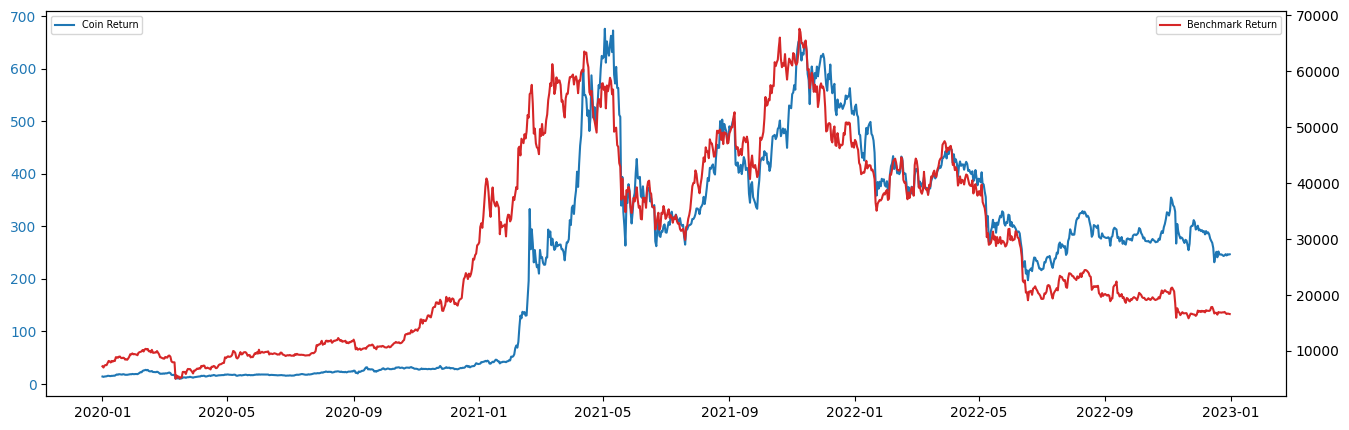

In [49]:
fig, ax1 = plt.subplots(figsize = (16,5))

ax1.plot(pf_data[stocks[0]], color = 'tab:blue',label = 'Coin Return')
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')
ax1.legend(loc = 'upper left', fontsize = 'x-small')
ax2 = ax1.twinx()
ax2.plot(pf_data[stocks[-1]], color = 'tab:red',label = 'Benchmark Return')
ax2.legend(loc = 'upper right', fontsize = 'x-small')
plt.show()

This graph displays the portfolio return of a single coin against the benchmark return over time. The `blue line` represents the return of the portfolio, while the `red line` represents the return of the benchmark.

By comparing the two lines on the graph, one can get an idea of how well the portfolio has performed relative to the benchmark. *If the blue line is consistently above the red line, it suggests that the portfolio has outperformed the benchmark. Conversely, if the blue line is consistently below the red line, it suggests that the portfolio has underperformed the benchmark*.

Additionally, the graph also shows the volatility of both the portfolio and benchmark returns over time. If there are large fluctuations in the blue and red lines, it indicates high volatility. On the other hand, if the lines are relatively stable, it suggests lower volatility.



In [50]:
def calculate_expected_return(coin,risk_free_return,coin_beta,benchmark_return):
    exp_ret = risk_free_return + coin_beta * (benchmark_return - risk_free_return)
    return round(exp_ret * 100,2)
portfoio_expected_return = calculate_expected_return(stocks[0],risk_free_return,coin_beta,sec_returns[benchmark_coin].mean()*annualize_days)
print(f"Portfolio Expected return is {portfoio_expected_return}%")


Portfolio Expected return is 28.55%


**Expected Return** is the anticipated return on an investment or portfolio, taking into account the potential risks and rewards. This function calculates the **expected return** of a portfolio based on the *risk-free rate of return*, *the beta coefficient* of a specific coin with respect to a *benchmark coin*, and *the expected return of the benchmark coin*.

 The investor can expect to earn a return of 28.55% on their investment in the portfolio, assuming that the market conditions and other factors remain constant. 

Alpha is a measure of the excess returns of a portfolio above its expected returns based on its level of systematic risk (measured by beta). It measures the performance of a portfolio relative to a benchmark index after adjusting for its level of systematic risk.
For example, if a portfolio has an alpha of 1.5%, this means that it has earned 1.5% more than its benchmark or expected return after adjusting for its level of risk, as measured by beta.

*Alpha = (Expected Portfolio Returns - Risk-Free Rate) - Beta * (Expected Benchmark Returns - Risk-Free Rate)*

In [62]:
def calculate_alpha(sec_returns,coin,benchmark_coin,risk_free_return,coin_beta):
    excess_pf_returns = sec_returns[coin].mean() - risk_free_return
    excess_bm_returns = sec_returns[benchmark_coin].mean() - risk_free_return
    alpha = excess_pf_returns - coin_beta * excess_bm_returns
    return alpha
alpha = calculate_alpha(sec_returns,stocks[0],benchmark_coin,risk_free_return,coin_beta)
print(f"Alpha of the {stocks[0]} is {round((alpha * 100),4)}%")


Alpha of the BNB-USD is 0.2487%


In [90]:
benchmark_coin

'BTC-USD'

### Adding multiple coins into the portfolio

In [68]:
stocks = ['BNB-USD','XRP-USD','ADA-USD','BTC-USD']
pf_data = pd.DataFrame()
for stock in stocks:
    pf_data[stock] = df_process(stock, start, end)
num_stocks = len(stocks)
sec_returns = np.log(pf_data / pf_data.shift(1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [69]:
pf_data.head(3)

,BNB-USD,XRP-USD,ADA-USD,BTC-USD
2020-01-01,13.689083,0.192667,0.033458,7200.174316
2020-01-02,13.027011,0.188043,0.032751,6985.470215
2020-01-03,13.660452,0.193521,0.034180,7344.884277


We need daily percentage change for these securities. The percentage change between each row of a DataFrame pf_data using the `pct_change()` method with a parameter of `1`, which computes the percentage change relative to the `previous row`.

In [70]:
pf_data_returns = pf_data.pct_change(1)
pf_data_returns = pf_data_returns[1:]

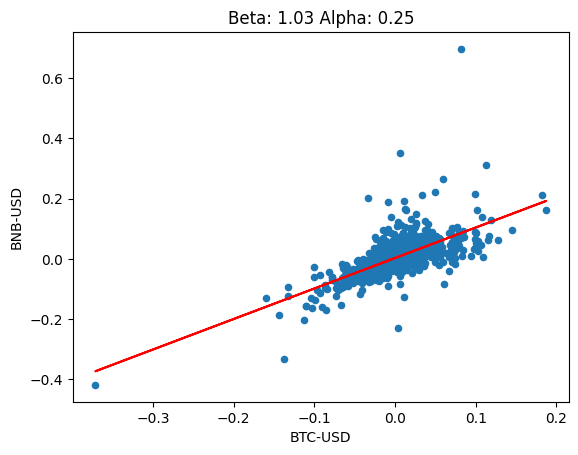

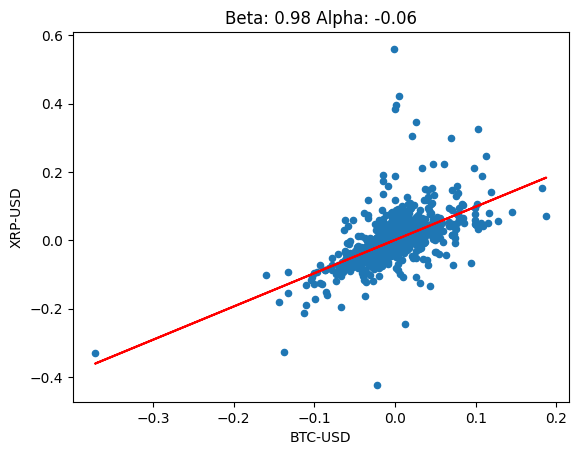

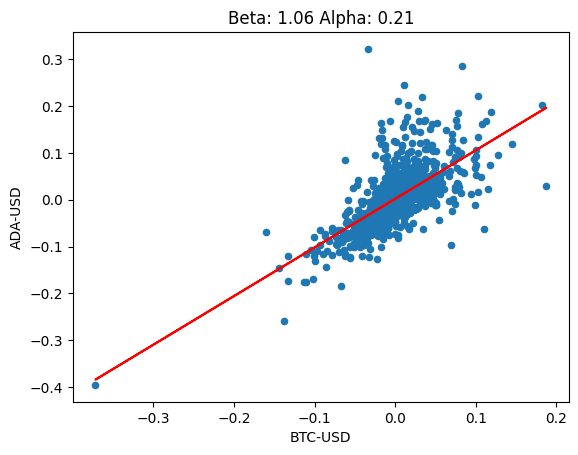

In [109]:
beta = {}
alpha = {}
for i,coin in enumerate(pf_data_returns.columns):
    if coin != benchmark_coin:
        pf_data_returns.plot(kind = 'scatter', x = benchmark_coin, y = coin)
        b, a = np.polyfit(pf_data_returns[benchmark_coin], pf_data_returns[coin], 1)
        plt.plot(pf_data_returns[benchmark_coin], b*pf_data_returns[benchmark_coin] + a, '-', color = 'r')
        beta[coin] = calculate_beta(sec_returns,i,(len(stocks) - 1))
        alpha[coin] = calculate_alpha(sec_returns,coin,benchmark_coin,risk_free_return,beta[coin])
        plt.title(f'Beta: {round(beta[coin],2)} Alpha: {round(alpha[coin]*100,2)}')
        plt.show()

Beta of the coins

In [107]:
for k,v in beta.items():
    print(f"Beta of {k} is {v}")

Beta of BNB-USD is 1.0315781467023462
Beta of XRP-USD is 0.9814533219075422
Beta of ADA-USD is 1.0558659131083012


Alpha of the coins

In [108]:
for k,v in alpha.items():
    print(f"Alpha of {k} is {round((v*100), 2)}%")

Alpha of BNB-USD is 0.25%
Alpha of XRP-USD is -0.06%
Alpha of ADA-USD is 0.21%


In [99]:
keys = list(beta.keys())
ER = {}
rf = 0.02
rm = pf_data_returns[benchmark_coin].mean() * annualize_days

for i in keys:
    ER[i] = rf + (beta[i] * (rm - rf))
    print('Expected Return for {} is {}%'.format(i,round(ER[i]*100,2)))

Expected Return for BNB-USD is 56.41%
Expected Return for XRP-USD is 53.77%
Expected Return for ADA-USD is 57.69%


we are assigning equal weights to each stock in the portfolio. We can then calculate the expected portfolio return by multiplying the portfolio_weights by the sum of expected returns for the individual stocks

In [100]:
portfolio_weights = 1/6 * np.ones(len(stocks) - 1) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
print('Expected Return based on CAPM for the portfolio is {}%\n'.format(round(ER_portfolio*100,2)))

Expected Return based on CAPM for the portfolio is 27.98%



Risk premium refers to the additional return that investors expect to receive for taking on higher levels of risk. It is the difference between the expected return on a risky investment and the risk-free rate of return.
The formula for calculating risk premium is:

*Risk Premium = Expected Return - Risk-Free Rate*

In [101]:
RM = {}
def calculate_risk_premium(expected_return, risk_free_return):
    return expected_return - risk_free_return

for i in keys:
    RM[i] = calculate_risk_premium(ER[i], risk_free_return)
    print('Risk Premium for {} is {}%'.format(i,round(RM[i]*100,2)))


Risk Premium for BNB-USD is 54.41%
Risk Premium for XRP-USD is 51.77%
Risk Premium for ADA-USD is 55.69%


### Expected Excess Return

The expected excess return for a stock is calculated as the expected *return on the stock* minus *the risk-free rate of return*. \
Mathematically, it can be expressed as:\
Expected Excess Return = Expected Return on Stock - Risk-Free Rate

In [104]:
def expected_excess_return(expected_returns,risk_free_rates):
    return np.subtract(expected_returns, risk_free_rates)
    

EER = {}
for i in keys:
    EER[i] = expected_excess_return(ER[i], risk_free_return)
    print('Expected Excess Return for {} is {}%'.format(i,round(EER[i]*100,2)))


Expected Excess Return for BNB-USD is 54.41%
Expected Excess Return for XRP-USD is 51.77%
Expected Excess Return for ADA-USD is 55.69%


### Total Risk

In [215]:
stocks = ['BNB-USD','XRP-USD','ADA-USD','BTC-USD']
pf_data = pd.DataFrame()
start = datetime(2023, 1, 1)
end = datetime(2023,3,1)
for stock in stocks:
    df = df_process(stock, start, end)
    df = pd.DataFrame((np.log(df).T).T)
    pf_data[stock] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [218]:
means = {}
for x in stocks:
    means[x] = pf_data[x].mean()
subs = pf_data.sub(means, axis = 1)
stds= {}
for coin in subs:
    stds[f"{coin}"] = (np.sqrt(np.sum(means[coin]) ** 2))/len(pf_data)


In [219]:
for x in stds:
    print(f'Total risk of {x} is {round(stds[x]*100,2)}%')

Total risk of BNB-USD_std is 9.66%
Total risk of XRP-USD_std is 1.62%
Total risk of ADA-USD_std is 1.75%
Total risk of BTC-USD_std is 16.91%
